## Cleaning numerical data LAB

CONTEXT:

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

SOME BUSINESS OBJECTIVES:
    
Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth

DATA ANALYSIS PROCESS:
    
1. Case Study
2. Get data
3. Cleaning/Wrangling/EDA
4. Processing Data
5. Modeling -Validation
6. Reporting

INSTRUCTIONS

Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower())
customer_df.columns = cols

In [8]:
customer_df.columns = customer_df.columns.str.replace("[ ]", "_", regex=True)

Change effective to date column to datetime format.

In [9]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

In [10]:
customer_df['effective_to_date'] 

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [11]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [12]:
numerical_df=customer_df.select_dtypes(np.number)

Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [13]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [14]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)

In [15]:
discrete_lst, continuous_lst = discrete_continuous(numerical_df)

In [16]:
discrete_df=numerical_df[discrete_lst]

In [17]:
continuous_df= numerical_df[continuous_lst]

In [18]:
print(discrete_lst)
print(continuous_lst)

['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


In [19]:
numerical_df['customer_lifetime_value'].unique

<bound method Series.unique of 0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: customer_lifetime_value, Length: 9134, dtype: float64>

Plot a correlation matrix, comment what you see.

In [20]:
correlations = numerical_df.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


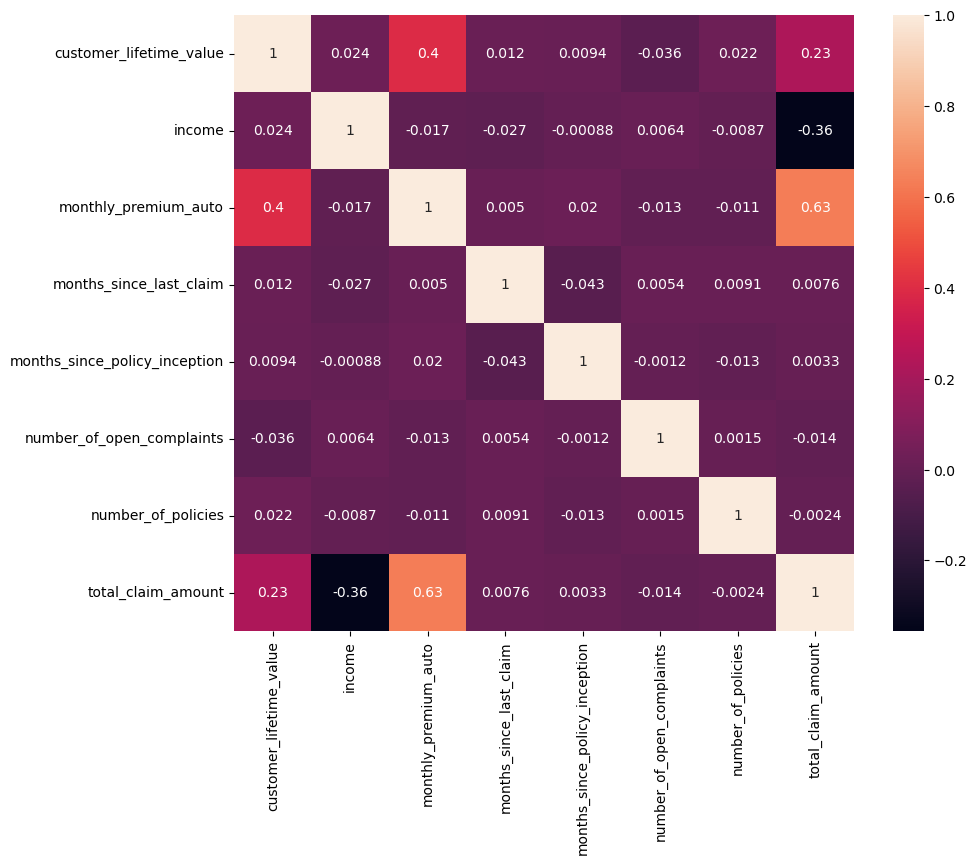

In [21]:
corr_matrix=numerical_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#i left the target variable in the dataframe, which is not relevant for the correlation matrix.
# I see there is no/ very low multicollinearity.

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

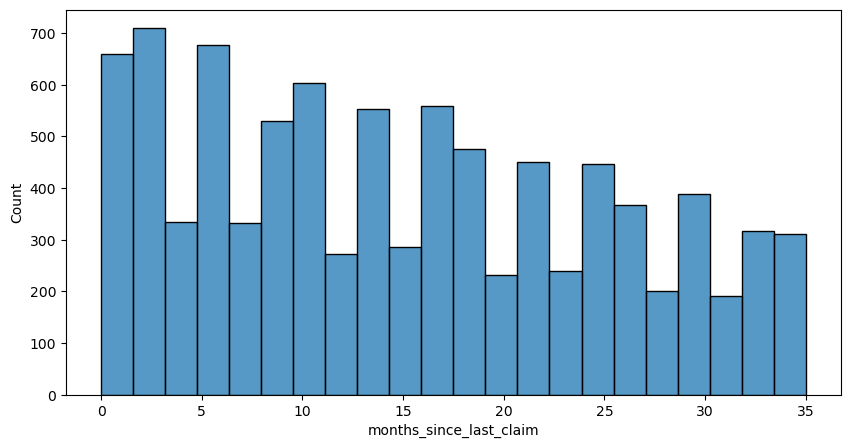

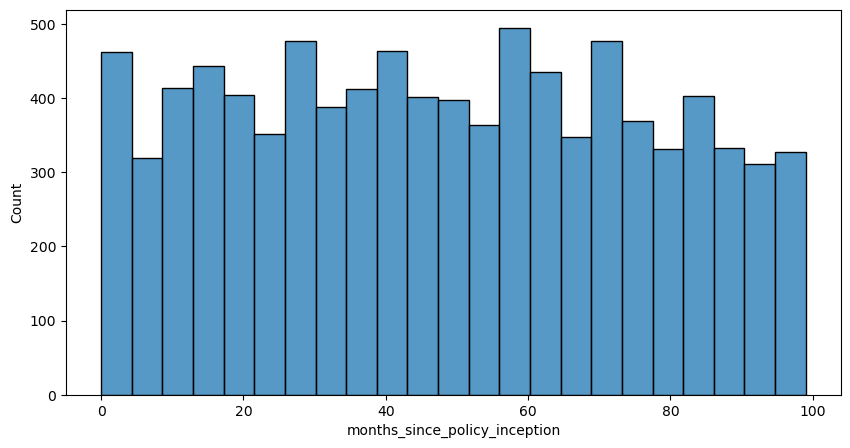

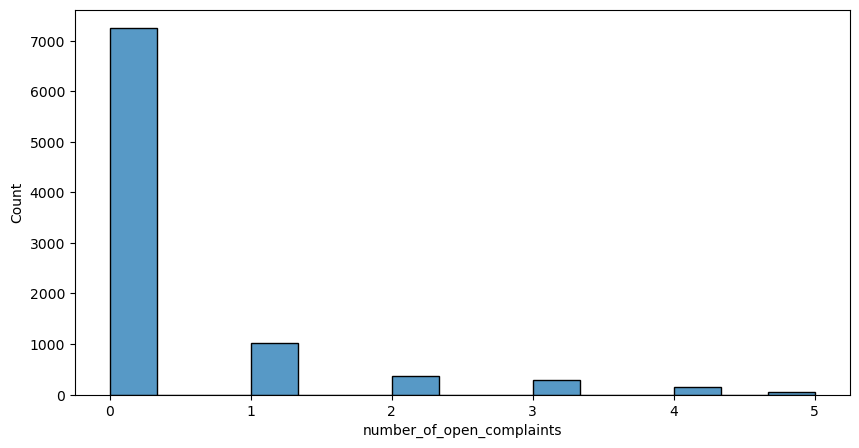

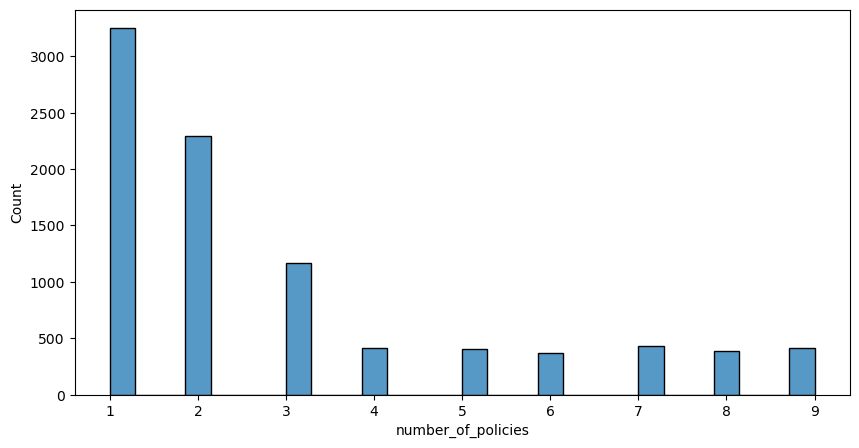

In [22]:
for col in discrete_df.columns:
    plt.figure(figsize=(10,5))
    plot=sns.histplot(x=col, data=discrete_df,)
    plt.show()

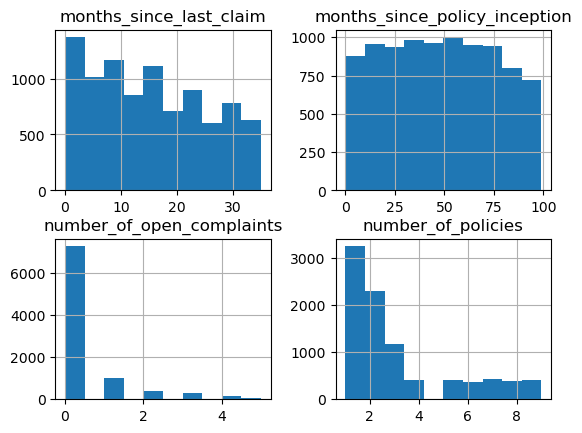

In [23]:
# for quick visualization
discrete_df.hist()
plt.show()

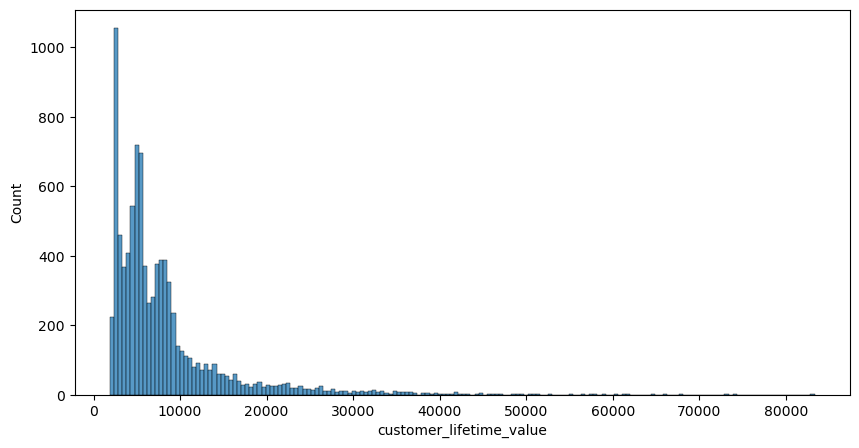

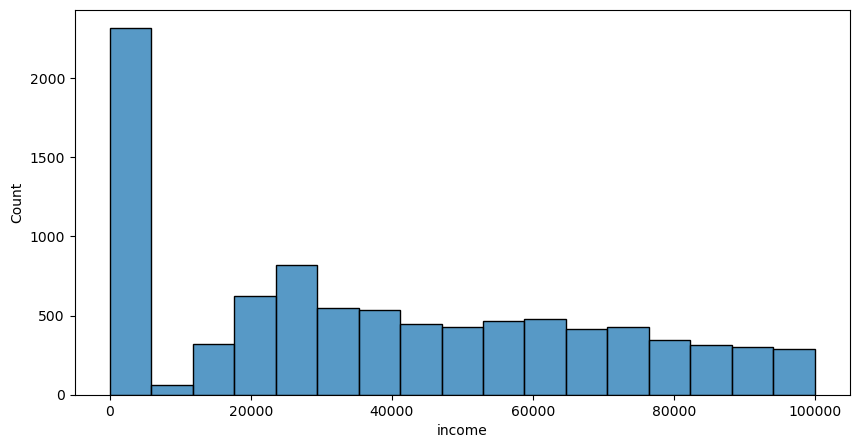

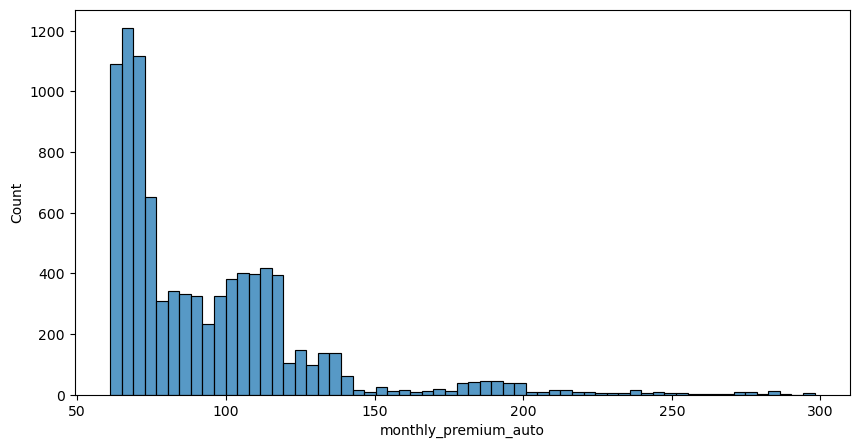

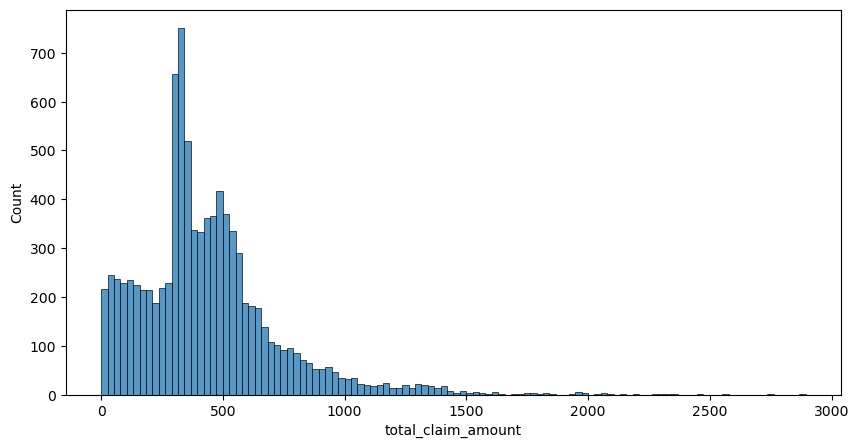

In [24]:
for col in continuous_df.columns:
    plt.figure(figsize=(10,5))
    plot=sns.histplot(x=col, data=continuous_df)
    plt.show()

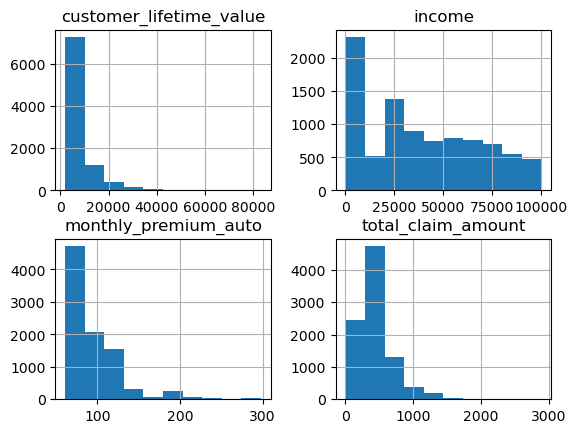

In [25]:
# for quick visualization
continuous_df.hist()
plt.show()

Comment what you can see in the plots.

In [26]:
# most columns are positively skewed, most people have 2 or less policies, there a lot of open complaints, months since policy 
# inception is quite contstant so constant influx of customers, most premiums are below 100usd per month, customer lifetime value for most customers is around 20.000usd


Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

<Axes: >

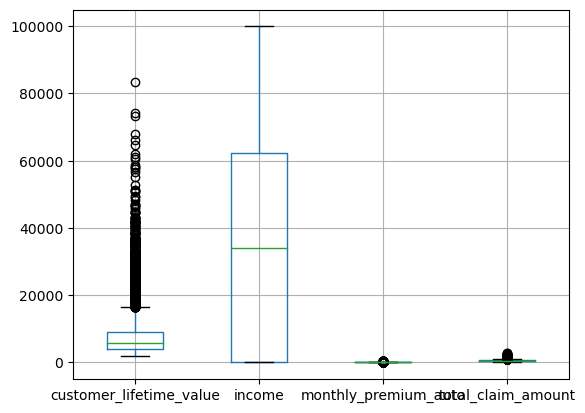

In [27]:
continuous_df.boxplot()
#I left this in because I want to know why all 4 boxplots are in the same graph. 
#if we run discrete_df.hisplot() we'd get 4 different graphs

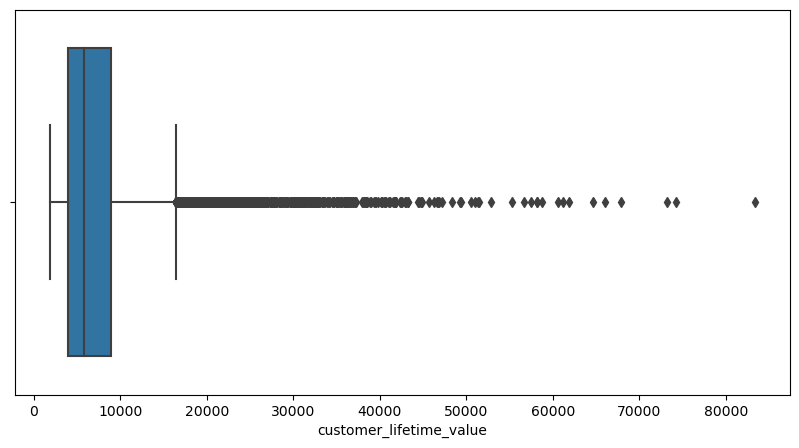

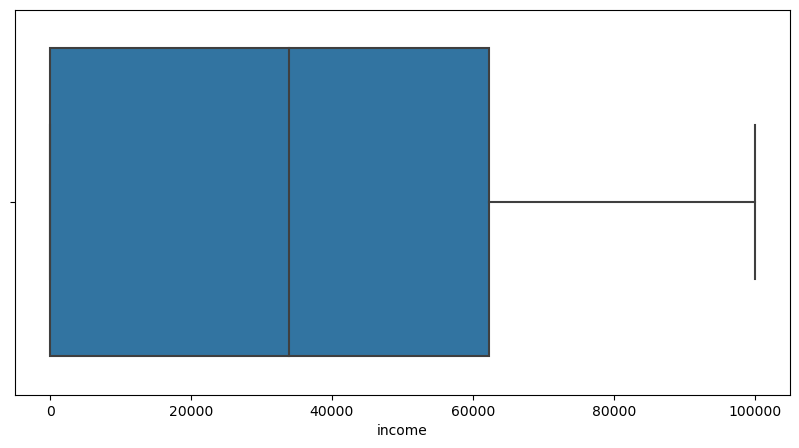

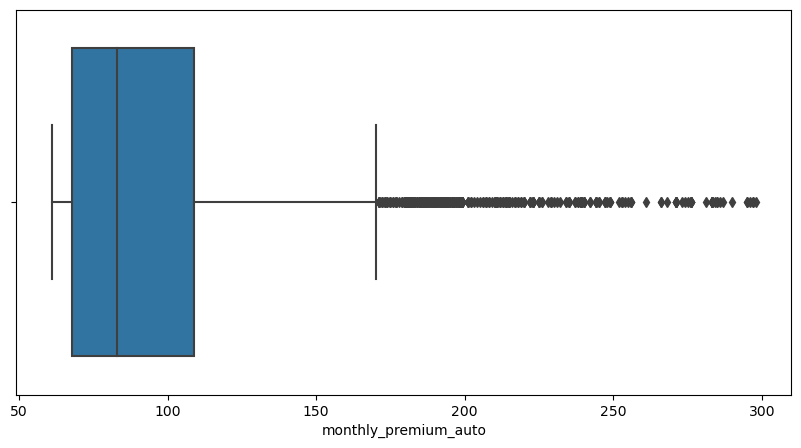

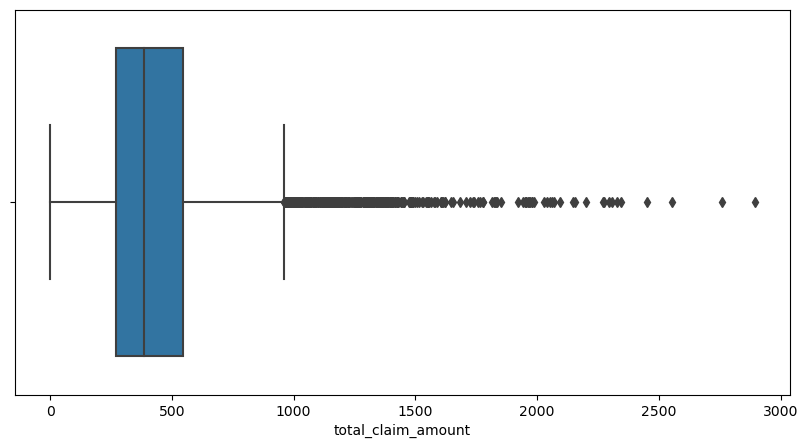

In [28]:
for col in continuous_df.columns:
    plt.figure(figsize=(10,5))
    plot=sns.boxplot(x=col, data=continuous_df)
    plt.show()

Did you find outliers? Comment what you will do with them. 
If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [29]:
# yes, but I'm not gonna do anything to them.

Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [30]:
numerical_df.isnull().sum()/len(numerical_df)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [31]:
#numerical_df.to_csv('numerical1.csv')

## Cleaning categorical data LAB

INSTRUCTIONS


Open the notebook created for Lab-cleaning-numerical-data.

In [32]:
#done

Find all of the categorical data. Save it in a categorical_df variable.

In [33]:
categorical_df=customer_df.select_dtypes(object)

Check for NaN values and decide what to do with them, do it now.


In [34]:
categorical_df.isna().sum().head()#/len(categorical_df)

customer     0
state        0
response     0
coverage     0
education    0
dtype: int64

In [35]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


Check all unique values of columns.

In [36]:
categorical_df["customer"].unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [37]:
categorical_df["state"].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [38]:
categorical_df["response"].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
categorical_df["coverage"].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [40]:
categorical_df["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [41]:
categorical_df["employmentstatus"].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [42]:
categorical_df["gender"].unique()

array(['F', 'M'], dtype=object)

In [43]:
categorical_df["location_code"].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [44]:
categorical_df["marital_status"].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [45]:
categorical_df["policy_type"].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [46]:
categorical_df["policy"].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [47]:
categorical_df["renew_offer_type"].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [48]:
categorical_df["sales_channel"].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [49]:
categorical_df["vehicle_class"].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [50]:
categorical_df["vehicle_size"].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

Does any column contain alpha and numeric data? Decide how to clean it and do it now.

Check dtypes. Do they all make sense as categorical data?

In [51]:
#they all make sense as categorical data
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [52]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [53]:
# <!-- the customer column does not tell me anything and will not be useful in making a model -->

In [54]:
categorical_df.drop('customer', axis='columns', inplace=True)

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [55]:
#personal,corporate and  special are you in both columns, referring to the same. I'd remove said words from the policy column. What is important is the type of customer, 

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [56]:
categorical_df["vehicle_size"].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [58]:
#categorical.to_csv('categorical1.csv')